# Regression Preprocessing Model Selection


## `00 ` Import libraries 

In [1]:
import numpy as np
import pandas as pd 
# visulaization
import matplotlib.pyplot as plt
import seaborn as sns

#check normality
from scipy.stats import shapiro
#for Normalization
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
#handling categorical feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
#VIF for removing multi-colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#for summary
from statsmodels.api import OLS
#for QQplot
import statsmodels.api as sm
#for generalization
from sklearn.linear_model import Ridge, Lasso
#spliting data
from sklearn.model_selection import train_test_split
#evaluating models
from sklearn.metrics import r2_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("house-prices/train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## `01 ` Split Data 

In [3]:
from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(df, test_size = 0.2, random_state = 2022)

In [4]:
## separating the categorical features and numerical features
num_cols = list(set(df.select_dtypes(exclude=[object]).columns) - set(['Id', 'SalePrice']))
cat_cols = list(df.select_dtypes(include=[object]).columns) 
ordinal_cols = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cols = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'MasVnrType', 'Neighborhood'] 
len(num_cols)

36

## `02` EDA

In [ ]:
train_data.info()

### `2.1` Check Normality for Skewness

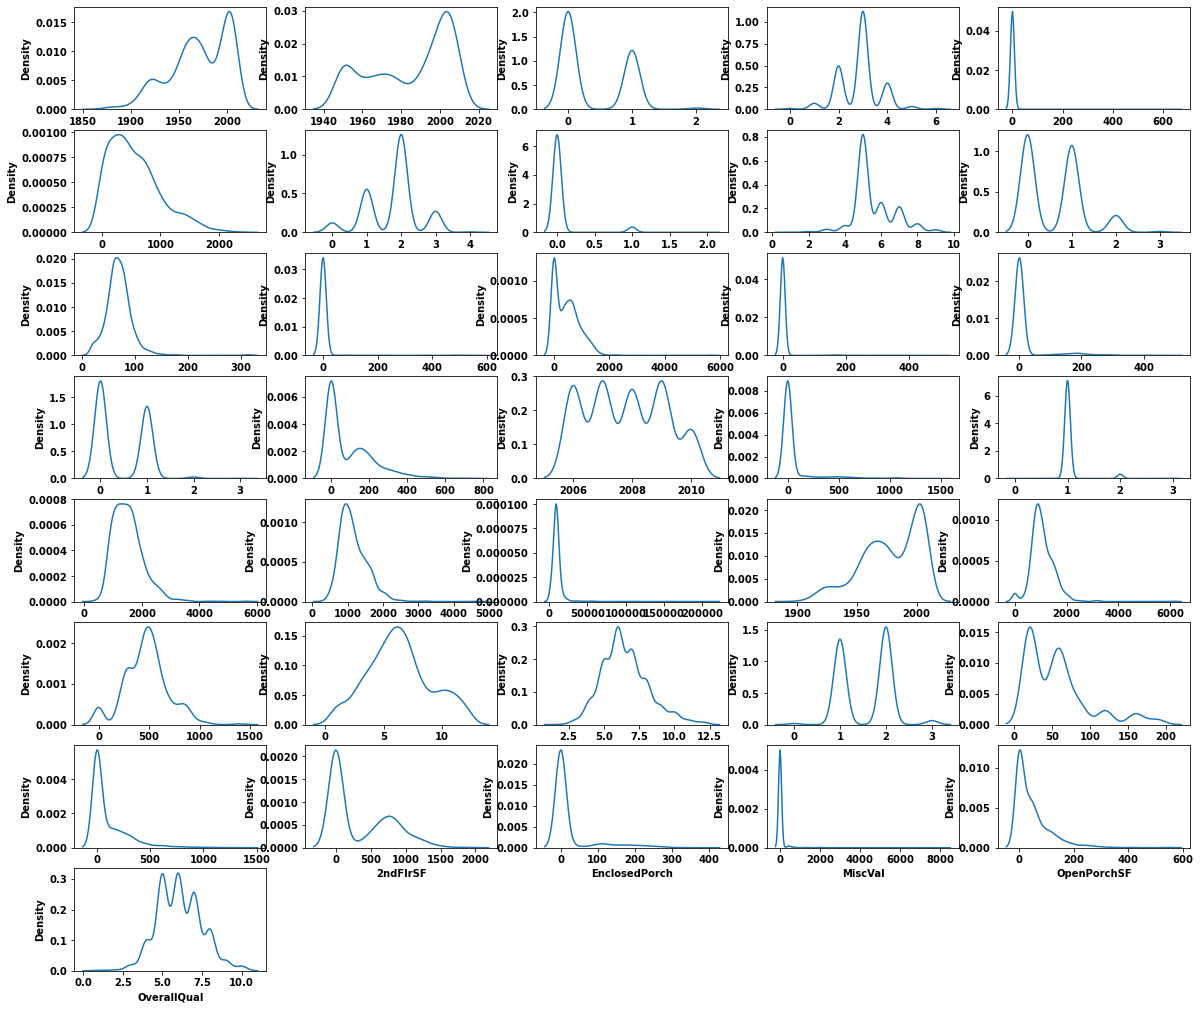

In [5]:

plt.figure(figsize=(20,20))
for i, col in enumerate(train_data[num_cols]):
    ax = plt.subplot(9, 5, i+1)
    sns.kdeplot(train_data[col], ax=ax)
plt.show()

### `2.2` Check Nulls

In [6]:
nulls_df = ((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]


,index,Nulls_Count
0,PoolQC,99.657534
1,MiscFeature,96.318493
2,Alley,93.578767
3,Fence,80.993151
4,FireplaceQu,48.287671
5,LotFrontage,17.893836
6,GarageYrBlt,5.479452
7,GarageCond,5.479452
8,GarageType,5.479452
9,GarageFinish,5.479452


### `2.3` Check Duplicates

In [7]:
#check Duplicates
df.duplicated().sum()

0

### `2.4` Check Outliers

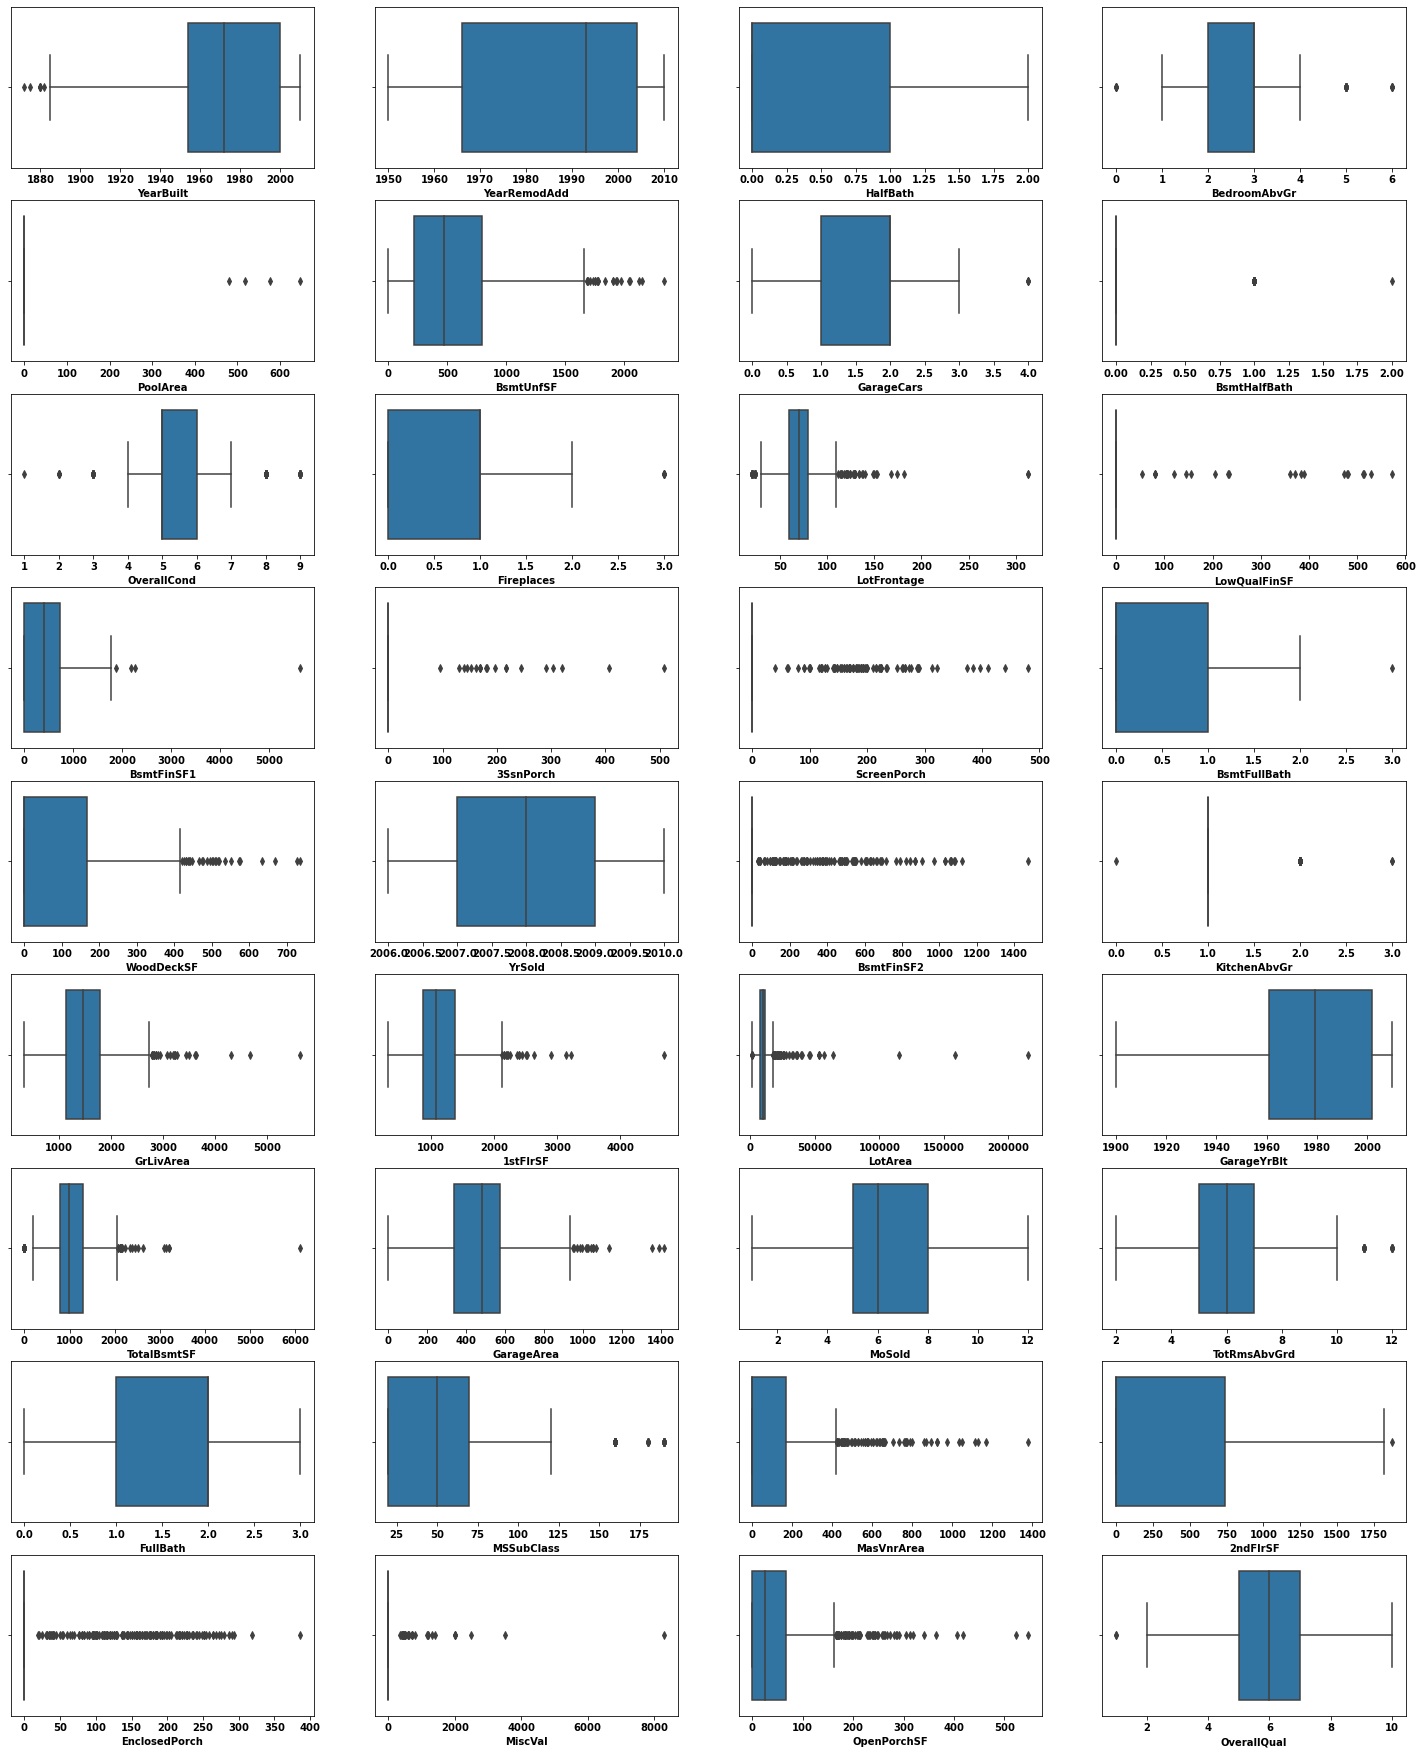

In [16]:
#Check Outliers
plt.figure(figsize=(25,35))
for i, col in enumerate(train_data[num_cols]):
    plt.subplot(10, 4, i+1)
    sns.boxplot(x = train_data[col]) 
plt.show()


### `2.5` Check Highly correlated features

<AxesSubplot:>

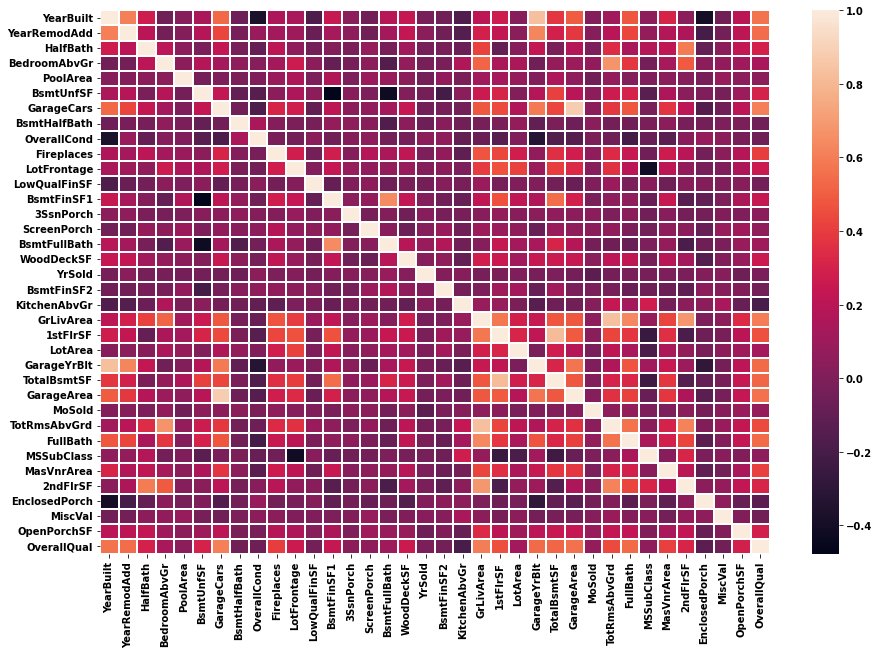

In [18]:
# making a heatmap to inspect the highly correlated features
import seaborn as sns
corr_matrix = train_data[num_cols].corr()
plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1)

 
> ### **Observations :**
> Data have : 
> 1. Nulls
> 2. Duplicate values
> 3. Highly Corrolated Features
> 4. Skewness
> 5. Outliers <br>
>




## `03` Data Preprocessing

#### `3.1` Handling Nulls

In [20]:
def handling_Nulls (df): 
    ## columns which have more than 60% of the data NULL values should be dropped
    df = df.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'])

    ## when the number of nulls in a row is very small, we can simply drop this small number of rows
    df = df.dropna(axis = 0, subset = ['GarageYrBlt', 'MasVnrArea', 'Electrical', 
                                                    'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
                                                    'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 
                                                    'BsmtQual', 'MasVnrType'])

    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

    return df

#### `3.2` Dropping any column which has certin values with duplicates

In [21]:
# making dataframes each of them contains the categories of a catgegorical variable and theire frequencies again
## separating the categorical features and numerical features
def calc_Duplicated_values(count_df, train_data, validation_data, duplicates_threshold):
    dropped_columns = []
    highest_freq_percentage = (count_df['count']/train_data.count()[0]).\
                        reset_index().sort_values(by = ['count'], ascending = False).iloc[0,1]
    if highest_freq_percentage >= duplicates_threshold:
        # print('we will drop the column ', count_df.columns[0])
        dropped_columns.append(count_df.columns[0])
        train_data = train_data.drop(columns = [count_df.columns[0]] )
        validation_data = validation_data.drop(columns = [count_df.columns[0]] )
    return train_data, validation_data

In [24]:
def dropping_duplicatedValues(train_data, validation_data, duplicates_threshold):
  df_list = []
  for col in list(set(train_data.columns) - set(['Id'])):
    df_list.append(train_data.groupby([col])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

  for idx in range(len(df_list)):
    train_data, validation_data = calc_Duplicated_values(df_list[idx], train_data, validation_data, duplicates_threshold)
  return train_data, validation_data


#### `3.3` Handling Highly Corrolated Features

In [25]:
def handling_highlyCorrolatedFeatures (train_data, validation_data, target, threshold = 0.7):
    num_cols = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id']))
    features_to_be_dropped = []
    num_cols_wthout_response_var = list(set(num_cols) - set([target]))
    corr_matrix = train_data[num_cols_wthout_response_var].corr() 

    for row_idx in range(corr_matrix.values.shape[0]):
        for col_idx in range(row_idx + 1,corr_matrix.values.shape[0]):
            if (np.abs(corr_matrix.values[row_idx, col_idx]) > threshold):
                var_row_corr_wth_response = np.abs(np.corrcoef(train_data[target], 
                                                        train_data[num_cols_wthout_response_var[row_idx]])[0, 1])
                var_col_corr_wth_response = np.abs(np.corrcoef(train_data[target], 
                                                        train_data[num_cols_wthout_response_var[col_idx]])[0, 1])
                
                if var_row_corr_wth_response > var_col_corr_wth_response:
                    # print('we will drop the column ', num_cols_wthout_response_var[col_idx])
                    train_data = train_data.drop(columns = [num_cols_wthout_response_var[col_idx]])
                    validation_data = validation_data.drop(columns = [num_cols_wthout_response_var[col_idx]])
                    features_to_be_dropped.append(num_cols_wthout_response_var[col_idx])
                else:
                    # print('we will drop the column ', num_cols_wthout_response_var[row_idx])
                    train_data = train_data.drop(columns = [num_cols_wthout_response_var[row_idx]])
                    validation_data = validation_data.drop(columns = [num_cols_wthout_response_var[row_idx]])
                    features_to_be_dropped.append(num_cols_wthout_response_var[row_idx])
    return train_data, validation_data

#### `3.4` Handling Outliers

In [26]:
def bounds_calc(train_data, col, boundry_threshold):
  Q1 = np.percentile(train_data[col], q = 25, interpolation = 'midpoint')
  Q3 = np.percentile(train_data[col], q = 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  Upper_Bound = Q3 + boundry_threshold * IQR
  Lower_Bound = Q1 - boundry_threshold * IQR
  return Lower_Bound, Upper_Bound
    
def outliers_clamping(Lower_Bound, Upper_Bound, value):
  if value > Upper_Bound:
    return Upper_Bound
  elif value < Lower_Bound:
    return Lower_Bound
  else:
    return value

def outliers_handling(train_data, validation_data, boundry_threshold):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id', 'SalePrice']))
    for col in num_data:
        Lower_Bound, Upper_Bound = bounds_calc(train_data, col, boundry_threshold)
        train_data[col] = train_data[col].apply(lambda x : outliers_clamping(Lower_Bound, Upper_Bound, x))
        validation_data[col] = validation_data[col].apply(lambda x : outliers_clamping(Lower_Bound, Upper_Bound, x))
    return train_data, validation_data

#### `3.5` Handling Skewness

In [27]:
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.count()[0]
    skewness = np.sum(np.power(df[col] - mean_col, 3))/((size_rows - 1) * np.power(std_col, 3))
    return skewness

def skewed_data_transformation(value):
  return np.log(1 + np.abs(value))

def skewness_handling(train_data, validation_data):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id', 'SalePrice']))
    skewed_train_cols = []
    for col in num_data: 
        sk = skewness_calc(col, train_data)
        if (np.abs(sk) >= 1):
            skewed_train_cols.append(col)
            train_data[col] = train_data[col].apply(lambda x : skewed_data_transformation(x))
            validation_data[col] = validation_data[col].apply(lambda x : skewed_data_transformation(x))
    return train_data, validation_data

#### `3.6` Feature Scaling

##### `3.6.1 ` Shapiro-Wilk (Normal Distribution) test

In [28]:
def Shapiro_Wilk_test (df, num_cols, alpha):
    feats_std_scale = []
    feats_min_max_scale = []
    sample_data  = train_data.sample(replace = False, n= 500)
    for col in num_cols:
        stat, p = shapiro(sample_data[col])
        if p > alpha:
            feats_std_scale.append(col)
        else:
            feats_min_max_scale.append(col)
    return feats_min_max_scale, feats_std_scale

##### `3.6.2 ` Scaling Features

In [30]:
# brute force code , Don't forget to enhance ittttttt  ----------------->
def scaling_features (train_data, validation_data, alpha):
    num_data = list(set(train_data.select_dtypes(exclude=[object]).columns) - set(['Id']))
    feats_min_max_scale, feats_std_scale = Shapiro_Wilk_test(train_data, num_data, alpha)
    
    if len(feats_std_scale) <= 0  :
        min_max_scaler = MinMaxScaler()
        min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
        min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
        min_max_scaled_validation_data = pd.DataFrame(min_max_scaler_model.transform(validation_data[feats_min_max_scale]), columns = feats_min_max_scale)
        num_train_data = min_max_scaled_train_data
        num_validation_data = min_max_scaled_validation_data
    elif len(feats_min_max_scale) <= 0 :
        std_scaler = StandardScaler()
        std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
        std_scaled_train_data = pd.DataFrame(std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
        std_scaled_validation_data = pd.DataFrame(std_scaler_model.transform(validation_data[feats_std_scale]), columns = feats_std_scale)
        num_train_data = std_scaled_train_data
        num_validation_data = std_scaled_validation_data
    else : 
        min_max_scaler = MinMaxScaler()
        min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
        min_max_scaled_train_data = pd.DataFrame(min_max_scaler_model.transform(train_data[feats_min_max_scale]), columns = feats_min_max_scale)
        min_max_scaled_validation_data = pd.DataFrame(min_max_scaler_model.transform(validation_data[feats_min_max_scale]), columns = feats_min_max_scale)
        
        std_scaler = StandardScaler()
        std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
        std_scaled_train_data = pd.DataFrame(std_scaler_model.transform(train_data[feats_std_scale]), columns = feats_std_scale)
        std_scaled_validation_data = pd.DataFrame(std_scaler_model.transform(validation_data[feats_std_scale]), columns = feats_std_scale)
        
        num_train_data = std_scaled_train_data.merge(min_max_scaled_train_data, right_index = True, left_index = True)
        num_validation_data = std_scaled_validation_data.merge(min_max_scaled_validation_data, right_index = True, left_index = True)
        
    print("features to be scaled with min max",  feats_min_max_scale)
    print("features to be scaled with standarization",  feats_std_scale)
    
    return num_train_data, num_validation_data


#### `3.7` Handling Categorical Data

In [32]:
def handling_catecorical(df, ordinal_cats, nominal_cats):
    ordinal_train_df = pd.DataFrame()
    for ordinal_feat in ordinal_cats:
        label_enc_model = LabelEncoder().fit(df[ordinal_feat])
        ordinal_train_df[ordinal_feat] = label_enc_model.transform(df[ordinal_feat])
        
    one_hot_enc_model = OneHotEncoder(sparse = False).fit(train_data[nominal_cats])
    nominal_train_data = one_hot_enc_model.transform(train_data[nominal_cats])

    a=one_hot_enc_model.categories_
    col_names=[]
    for list_ in a:
        for element in list_:
            col_names.append(element)

    nominal_train_df = pd.DataFrame(nominal_train_data, columns = col_names)
    return nominal_train_df, ordinal_train_df

### `3.8` Merge Data

In [36]:
def merge_final_data(nominal_train_df, ordinal_train_df, num_train_df, nominal_test_df, ordinal_test_df, num_validation_df):
    final_train_data = nominal_train_df.merge(ordinal_train_df, right_index = True, left_index = True, how = 'inner')\
    .merge(num_train_df, right_index = True, left_index = True, how = 'inner')

    final_test_data = nominal_test_df.merge(ordinal_test_df, right_index = True, left_index = True, how = 'inner')\
    .merge(num_validation_df, right_index = True, left_index = True, how = 'inner')

    return final_train_data, final_test_data

### **Pre-Processing Function** 

In [38]:
def pre_processing(train_data, validation_data, ordinal_cats, nominal_cats, target, boundry_threshold , correlation_threshold, duplicates_threshold, shapiro_alpha):
    
    #0) handling nulls    
    train_data =  handling_Nulls (train_data)
    validation_data =  handling_Nulls (validation_data)

    #1) dropping duplicated Values
    train_data, validation_data = dropping_duplicatedValues(train_data, validation_data, duplicates_threshold)
    
    #2) handling highly Corrolated Features
    train_data, validation_data= handling_highlyCorrolatedFeatures (train_data, validation_data, target, correlation_threshold)

    #3) outliers handling for the whole data using training data boundries
    train_data, validation_data = outliers_handling(train_data, validation_data, boundry_threshold)

    #4) skewness handling for the whole data training data boundries
    train_data, validation_data = skewness_handling(train_data, validation_data)

    #5) Scaling Features
    num_train_df, num_validation_df = scaling_features (train_data, validation_data, shapiro_alpha)

    #6) handling categorical data 
    nominal_train_df, ordinal_train_df = handling_catecorical(train_data, ordinal_cats, nominal_cats)
    nominal_test_df, ordinal_test_df = handling_catecorical(validation_data, ordinal_cats, nominal_cats)

    #7) Merge all these stuff together
    final_train_data, final_test_data =  merge_final_data(nominal_train_df, ordinal_train_df, num_train_df,
                                                        nominal_test_df, ordinal_test_df, num_validation_df)

    return final_train_data, final_test_data

In [41]:
final_train_data, final_test_data = pre_processing( train_data,
                                                    validation_data,
                                                    ordinal_cols,
                                                    nominal_cols,
                                                    target='SalePrice',
                                                    boundry_threshold = 1.5,
                                                    correlation_threshold = 0.7,
                                                    duplicates_threshold = 0.8,
                                                    shapiro_alpha = 0.001
                                                    )   
print(f'final_train_data shape = {final_train_data.shape}')  
print(f'final_test_data shape = {final_test_data.shape}')  

features to be scaled with min max ['YearBuilt', 'YearRemodAdd', 'HalfBath', 'BedroomAbvGr', 'LotArea', 'BsmtUnfSF', 'MoSold', 'GarageCars', 'OverallCond', 'Fireplaces', 'LotFrontage', 'FullBath', 'MSSubClass', 'BsmtFinSF1', 'MasVnrArea', '2ndFlrSF', 'BsmtFullBath', 'OverallQual', 'WoodDeckSF', 'OpenPorchSF', '1stFlrSF', 'YrSold', 'SalePrice', 'GrLivArea']
features to be scaled with standarization []
final_train_data shape = (1068, 129)
final_test_data shape = (270, 129)


In [115]:
final_train_data.head(5)

,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Corner,CulDSac,FR2,FR3,Inside,Flat,Gable,Gambrel,Hip,Mansard,Shed,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,NaN,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,BrkTil,CBlock,PConc,Slab,Stone,Wood,C (all),FV,RH,RL,RM,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,NaN,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,BsmtQual,LotShape,HeatingQC,BsmtFinType1,ExterQual,KitchenQual,BsmtExposure,GarageFinish,SalePrice,LotArea,YrSold,BsmtFullBath,FullBath,GrLivArea,LotFrontage,WoodDeckSF,MoSold,YearBuilt,GarageCars,BsmtFinSF1,2ndFlrSF,MSSubClass,MasVnrArea,BsmtUnfSF,Fireplaces,1stFlrSF,OverallCond,BedroomAbvGr,YearRemodAdd,HalfBath,OverallQual,OpenPorchSF
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,3,2,3,3,3,3,1,0.190623,0.591906,0.75,0.0,0.666667,0.536118,0.50000,0.908398,0.545455,0.736626,0.4,0.122327,0.411014,0.549925,0.743696,0.116311,0.4,0.280292,0.375,0.625,0.466667,0.5,0.500,0.000000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,2,2,3,3,0,0,0.207991,0.593381,0.00,0.5,0.666667,0.462052,0.50000,0.754251,0.454545,0.893004,0.4,0.386468,0.380927,0.549925,0.000000,0.053309,0.4,0.212555,0.375,0.625,0.783333,0.5,0.500,0.841091
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0,2,2,2,0,0,0.151022,0.159056,0.75,0.5,0.333333,0.176553,0.51197,0.817774,0.454545,0.942387,0.4,0.370771,0.000000,0.903142,0.843629,0.098743,0.0,0.239416,0.375,0.125,0.900000,0.0,0.500,0.000000
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0,1,2,2,2,1,0.256623,0.655913,1.00,0.0,0.666667,0.474970,0.81250,0.000000,0.363636,0.958848,0.4,0.650068,0.000000,0.000000,0.890110,0.205967,0.4,0.644088,0.375,0.625,0.916667,0.0,0.625,0.827874
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,0,2,2,0,0,0,0.318540,0.130003,0.00,0.5,0.666667,0.486166,0.28750,0.949550,0.818182,0.967078,0.8,0.624628,0.000000,0.903142,0.000000,0.221717,0.4,0.659270,0.375,0.125,0.933333,0.0,0.750,0.000000


## `04 ` Split Data into dependent cols and response col (X, Y)

In [43]:
X_train = final_train_data.loc[:, final_train_data.columns!='SalePrice']
Y_train = final_train_data[['SalePrice']]
print(f'X_train shape : {X_train.shape}, Y_train shape : {Y_train.shape}')

X_test = final_test_data.loc[:, final_train_data.columns!='SalePrice']
Y_test = final_test_data[['SalePrice']]
print(f'X_test shape : {X_test.shape}, Y_test shape : {Y_test.shape}')



X_train shape : (1068, 128), Y_train shape : (1068, 1)
X_test shape : (270, 128), Y_test shape : (270, 1)


## `05`  Finaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaally Training The Model :D 

### `5.0` Evaluating our linear regression model functions

In [49]:
def mse(actual, predicted):
  return np.mean(np.square(actual-predicted))

def rmse(actual, predicted):
  return np.sqrt(np.mean(np.square(actual-predicted)))

def mae(actual, predicted):
  return np.mean(np.abs(actual-predicted))

def mape(actual, predicted, epsilon = 0.0001):
  return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

def rae(actual, predicted):
  numerator = np.sum(np.abs(predicted - actual))
  denominator = np.sum(np.abs(np.mean(actual) - actual))
  return numerator / denominator

def r_squared(actual, predicted):
  sse = np.sum(np.square(actual-predicted))
  sst = np.sum(np.square(actual-np.mean(actual)))
  return 1 - (sse/sst)

def adj_r_squared(X, actual, predicted): 
  r_squ = r_squared(actual, predicted)
  first_term = 1 - r_squ
  sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
  return 1 - (first_term * sec_term)

def Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred):
  print('               :  Train Data     |   Test Data ')
  print('mse            : ', mse(Y_train, y_train_pred).to_string(index=False), '  | ', mse(Y_test, y_test_pred).to_string(index=False))
  print('rmse           : ', rmse(Y_train, y_train_pred).to_string(index=False), '  | ', rmse(Y_test, y_test_pred).to_string(index=False))
  print('mae            : ', mae(Y_train, y_train_pred).to_string(index=False), '  | ',  mae(Y_test, y_test_pred).to_string(index=False))
  print('mape           : ', mape(Y_train, y_train_pred).to_string(index=False), '  | ', mape(Y_test, y_test_pred).to_string(index=False))
  print('rae            : ', rae(Y_train, y_train_pred).to_string(index=False), '  | ', rae(Y_test, y_test_pred).to_string(index=False))
  print('r_squared      : ', r_squared(Y_train, y_train_pred).to_string(index=False), '  | ', r_squared(Y_test, y_test_pred).to_string(index=False))
  print('adj_r_squared  : ', adj_r_squared(X_train, Y_train, y_train_pred).to_string(index=False), '  | ', adj_r_squared(X_test, Y_test, y_test_pred).to_string(index=False))


### `5.1` Linear regression 


 

### Linear regression (that used all the features coming from the pre-processing step, without any subset selection) 

In [50]:
reg = LinearRegression().fit(X_train.values, Y_train.values)
y_train_pred = reg.predict(X_train.values)
y_test_pred = reg.predict(X_test.values)

Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred)

               :  Train Data     |   Test Data 
mse            :  0.00176   |  0.001874
rmse           :  0.041958   |  0.043292
mae            :  0.026423   |  0.029511
mape           :  18.339968   |  17.76366
rae            :  0.329663   |  0.385873
r_squared      :  0.85701   |  0.827026
adj_r_squared  :  0.837518   |  0.67


### Linear regression (that used the features with no multi-collinearity, and filtered from the insignificant features using the backward stepwise subset selection)

##### `01` Remove "Multicollinearity" using Variance Inflation Factor (VIF)

In [51]:
def remove_high_vif_feats (X_train, X_test):
    high_vif_feats = []
    clean_Xtrain = X_train
    clean_Xtest = X_test
    num_of_removed_Cols = 0
    for idx in range (len(clean_Xtrain.columns)):
        num_of_removed_Cols = X_train.shape[1] - clean_Xtrain.shape[1]
        updated_idx = abs(idx - num_of_removed_Cols)
        feat = variance_inflation_factor(clean_Xtrain.values, updated_idx)
        if feat > 20:
            high_vif_feats.append(clean_Xtrain.columns[updated_idx])
            clean_Xtrain = clean_Xtrain.drop(columns = [clean_Xtrain.columns[updated_idx]])
            clean_Xtest = clean_Xtest.drop(columns = [clean_Xtest.columns[updated_idx]])
    return clean_Xtrain, clean_Xtest, high_vif_feats
clean_Xtrain, clean_Xtest, high_vif_feats = remove_high_vif_feats (X_train, X_test)
clean_Xtrain.shape

c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Orange\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


(1068, 96)

##### `02` Remove_insiinsignificant_feat

In [1]:
# p_values > 0.05 is least significant for the model so we remove them
# P_value > 0.05 -> fail to reject H0
def Remove_insiinsignificant_feat (clean_Xtrain):
    insignificant_feat_ls = []
    insignificant_feat_df = clean_Xtrain
    LResult = OLS(Y_train, insignificant_feat_df).fit().summary2().tables[1].reset_index().rename(columns = {'index': 'feature_name'})
    while LResult['P>|t|'].max() > 0.05:
        # get the feature with max p_value 
        feat = LResult[LResult['P>|t|'] == LResult['P>|t|'].max()][['feature_name']].values[0,0] 
        insignificant_feat_ls.append(feat)
        insignificant_feat_df = insignificant_feat_df.drop(columns=[feat])
        LResult = OLS(Y_train, insignificant_feat_df).fit().summary2().tables[1].reset_index().rename(columns = {'index': 'feature_name'})
    print(len(insignificant_feat_ls)) 
    return insignificant_feat_df, insignificant_feat_ls
    
# insignificant_feat_df, insignificant_feat_ls = Remove_insiinsignificant_feat (clean_Xtrain)

### `Check The Accurecy again after removing high_vif_feats + insignificant_feat_ls`

In [53]:
reg = LinearRegression().fit(clean_Xtrain.values, Y_train.values)
y_train_pred = reg.predict(clean_Xtrain.values)
y_test_pred = reg.predict(clean_Xtest.values)
Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred)

               :  Train Data     |   Test Data 
mse            :  0.002168   |  0.002545
rmse           :  0.046567   |  0.050449
mae            :  0.030795   |  0.034352
mape           :  32.660655   |  20.245846
rae            :  0.384201   |  0.449171
r_squared      :  0.82387   |  0.765111
adj_r_squared  :  0.799861   |  0.551879


### `5.2` After Regularization


 

### Lasso regression 
#### Tuning alpha ( Train Data ) 


C:\Users\CRIZMA~1\AppData\Local\Temp/ipykernel_11308/2384970139.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  sklearn_Lasso.fit(X_train.values, Y_train.values)
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.392e-01, tolerance: 1.315e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skl

Text(0.5, 1.0, 'Lasso In Train Data')

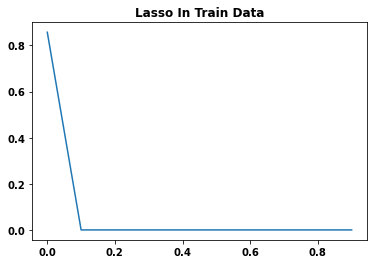

In [71]:
scores = []
n = np.linspace(0, 1, num = 10, endpoint = False)
for lambda_ in n:
    sklearn_Lasso = Lasso(alpha = lambda_)
    sklearn_Lasso.fit(X_train.values, Y_train.values)
    y_lasso_sklearn = sklearn_Lasso.predict(X_train.values) # on train Data
    scores.append(r2_score(Y_train, y_lasso_sklearn))
plt.plot(n, scores)
plt.title('Lasso In Train Data')

In [72]:
sklearn_Lasso = Lasso(alpha = 0)
sklearn_Lasso.fit(X_train.values, Y_train.values)
y_train_pred = sklearn_Lasso.predict(X_train.values).reshape(-1, 1)
y_test_pred = sklearn_Lasso.predict(X_test.values).reshape(-1, 1)


Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred)

C:\Users\CRIZMA~1\AppData\Local\Temp/ipykernel_11308/3616911729.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  sklearn_Lasso.fit(X_train.values, Y_train.values)
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.392e-01, tolerance: 1.315e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skl

               :  Train Data     |   Test Data 
mse            :  0.001759   |  0.001879
rmse           :  0.041938   |  0.043348
mae            :  0.02636   |  0.02946
mape           :  17.198874   |  17.686168
rae            :  0.328869   |  0.385209
r_squared      :  0.857147   |  0.826586
adj_r_squared  :  0.837675   |  0.669161


#### Tuning alpha ( Validation Data ) 


C:\Users\CRIZMA~1\AppData\Local\Temp/ipykernel_11308/2248209872.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  sklearn_Lasso.fit(X_train.values, Y_train.values)
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\CRIZMA MEGA STORE\AppData\Local\Programs\Orange\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.392e-01, tolerance: 1.315e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in skl

Text(0.5, 1.0, 'Lasso In Test Data')

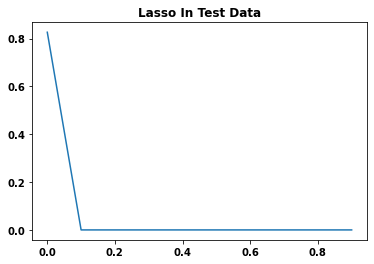

In [83]:
scores = []
n = np.linspace(0, 1, num = 10, endpoint = False)
for lambda_ in n:
    sklearn_Lasso = Lasso(alpha = lambda_)
    sklearn_Lasso.fit(X_train.values, Y_train.values)
    y_lasso_sklearn = sklearn_Lasso.predict(X_test.values) # validation Data
    scores.append(r2_score(Y_test, y_lasso_sklearn))
plt.plot(n, scores)
plt.title('Lasso In Test Data')

Note : Since we got the same graph for both = 0, So Lasso Regression is not suitable in this case and the regular Linear Regression would be better more than Lasso

### Ridge regression 
#### Tuning Alpha (Train Data)

Text(0.5, 1.0, 'Ridge In Train Data')

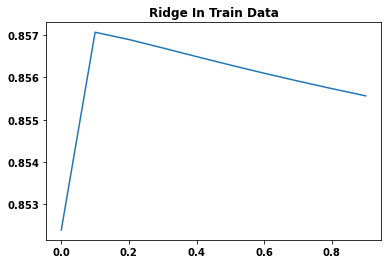

In [74]:
scores = []
n = np.linspace(0, 1, num = 10, endpoint = False)
for lambda_ in n:
    sklearn_Ridge = Ridge(alpha = lambda_)
    sklearn_Ridge.fit(X_train.values, Y_train.values)
    y_Ridge_sklearn = sklearn_Ridge.predict(X_train.values)
    scores.append(r2_score(Y_train, y_Ridge_sklearn))
plt.plot(n, scores)
plt.title('Ridge In Train Data')

In [81]:
sklearn_Ridge = Ridge(alpha = 0.1)
sklearn_Ridge.fit(X_train.values, Y_train.values)
y_train_pred = sklearn_Ridge.predict(X_train.values).reshape(-1, 1)
y_test_pred = sklearn_Ridge.predict(X_test.values).reshape(-1, 1)
Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred)

               :  Train Data     |   Test Data 
mse            :  0.00176   |  0.001899
rmse           :  0.04195   |  0.043583
mae            :  0.02637   |  0.029411
mape           :  17.680102   |  17.630017
rae            :  0.329001   |  0.384574
r_squared      :  0.857063   |  0.824699
adj_r_squared  :  0.837578   |  0.66556


Text(0.5, 1.0, 'Ridge In Test Data')

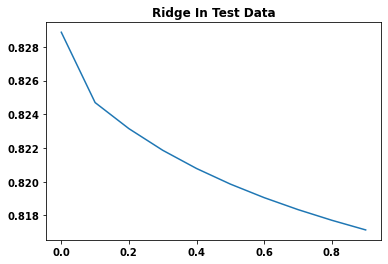

In [84]:
scores = []
n = np.linspace(0, 1, num = 10, endpoint = False)
for lambda_ in n:
    sklearn_Ridge = Ridge(alpha = lambda_)
    sklearn_Ridge.fit(X_train.values, Y_train.values)
    y_ridge_sklearn = sklearn_Ridge.predict(X_test.values)
    scores.append(r2_score(Y_test, y_ridge_sklearn))
plt.plot(n, scores)
plt.title('Ridge In Test Data')

In [85]:
sklearn_Ridge = Ridge(alpha = 0)
sklearn_Ridge.fit(X_train.values, Y_train.values)
y_train_pred = sklearn_Ridge.predict(X_train.values).reshape(-1, 1)
y_test_pred = sklearn_Ridge.predict(X_test.values).reshape(-1, 1)
Evaluation_report (X_train, Y_train, y_train_pred, X_test, Y_test, y_test_pred)

               :  Train Data     |   Test Data 
mse            :  0.001817   |  0.001854
rmse           :  0.042629   |  0.043061
mae            :  0.026945   |  0.029197
mape           :  18.110281   |  17.558153
rae            :  0.336177   |  0.381773
r_squared      :  0.852399   |  0.828874
adj_r_squared  :  0.832279   |  0.673526


### Checking the linear regression model assumptions

Plot of the residuals versus the fitted values. 
The plot should show a random scatter of points above and below the zero
line if E(residuals) = 0 and no fanning out/in pattern if constant variance
hold (homoskedasticity) [Assumptions 1 & 2]

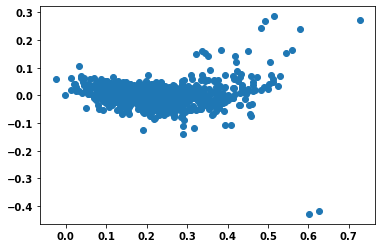

In [87]:
import matplotlib.pyplot as plt
residuals = Y_train - y_train_pred
# the linear regression model without any regularization or subset selection
plt.scatter(y_train_pred, residuals)
plt.show()
# we can see from the plot that there is no fanning in or out
# therefore, (homoskedasticity/ constant variance) condition hold

# we can also see that the residuals follow a random pattern above and below the zero line horizontally
# so the average of the residuals is nealry zero

Use Histograms or normal probability plots (Q-Q plot) of residuals.
Ideally, the histogram should be bell-shaped & the points in Q-Q plot should lie on a straight diagonal line if normality holds. [Assumption 3]

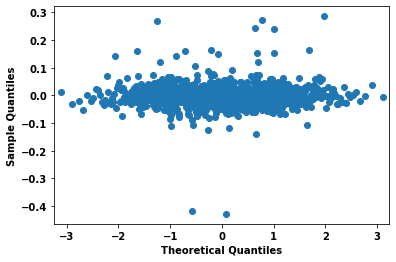

In [88]:
## checking the normality of residuals
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot 
fig = sm.qqplot(residuals, fit = False )
plt.show()

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

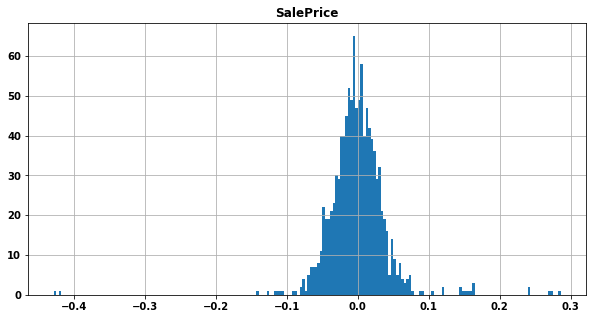

In [89]:
residuals.hist(bins = 200, figsize = (10, 5))

### Basis expansion of the input data to get a polynomial representation which might result in better overall model results 

### `5.3` Polynomial Regression


 

In [92]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train.values)
X_poly_test = poly.transform(X_test.values)

poly_feats_linear_reg = LinearRegression()
poly_feats_linear_reg.fit(X_poly_train, Y_train)
poly_trian_preds = poly_feats_linear_reg.predict(X_poly_train)
poly_test_preds = poly_feats_linear_reg.predict(X_poly_test)


In [93]:
Evaluation_report (X_train, Y_train, poly_trian_preds, X_test, Y_test, poly_test_preds)

               :  Train Data     |   Test Data 
mse            :  1.794001e-31   |  0.005314
rmse           :  4.235564e-16   |  0.072897
mae            :  3.288373e-16   |  0.055037
mape           :  6.757865e-13   |  30.838572
rae            :  4.102644e-15   |  0.71964
r_squared      :  1.0   |  0.509571
adj_r_squared  :  1.0   |  0.064359


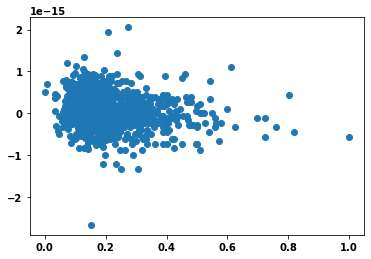

In [97]:
residuals = Y_train - poly_trian_preds
# the polynomial regression model without any regularization or subset selection
plt.scatter(poly_trian_preds, residuals)
plt.show()

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

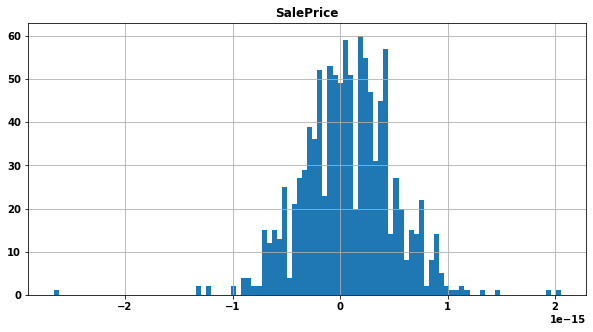

In [98]:
residuals.hist(bins = 100, figsize = (10, 5))

# To sum all the results up, we have :

|       Models          | R2 in Train  |R2 in Test  | alpha     | Dergee |
|-------------------    |-------        |-------  |-------    |-------    
| linear Regression Before subset selection    | 0.85701   |  0.827026           |   -       | -|
| linear Regression After subset selection         | 0.82387   |  0.765111   | - |     -|                  
| Ridge Regression      	| 0.857063   |  0.824699	| 0.1   	|   -   |
| Lasso Regression      	| 0.857147   |  0.826586  	|   0   	|   -   |
| Polynomail Regression      	| 1.0   |  0.509571 	|   -   	|   2   |
# ____________________________________________________________________


 # I didn't expect that comming :"D 